### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [66]:
import pandas as pd
df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")
X = df[['type','datetime','post_id','subreddit','title','author','text','label']].copy()

for i in range(3):
    print(f"Example {i+1}")
    for col in X.columns:
        print(f"{col}: {X.loc[i, col]}")
    print("-" * 80)

Example 1
type: comment
datetime: 2025-04-11 17:29:56
post_id: mmli62w
subreddit: wallstreetbets
title: Retardation is on the menu boys! WSB is so back
author: StickyTip420
text: Calls on retards
label: -1.0
--------------------------------------------------------------------------------
Example 2
type: comment
datetime: 2025-04-12 1:12:19
post_id: mmnu7v9
subreddit: wallstreetbets
title: Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history
author: Comfortable-Dog-8437
text: Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
label: 0.0
--------------------------------------------------------------------------------
Example 3
type: comment
datetime: 2025-04-10 15:09:41
post_id: mmeevio
subreddit: StockMarket
title: How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and a policy decision?
author:

In [11]:
X.loc[lambda X1: X1['type'] == 'comment', :][0:5] 

Exercise 2



,type,datetime,post_id,subreddit,title,author,text
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,Calls on retards
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,Stunt as in like why did they even make a big ...
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,Seeing lots of red in the ticker.
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,He didn’t say thank you.
5,comment,2025-04-12 2:19:03,mmo4k9g,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,PolarNimbus,"Hoping to ejaculate in wet warm puss tonight, ..."


In [13]:
import helpers.data_mining_helpers as dmh

X.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

In [ ]:
X = X.dropna(subset=['text', 'title']).reset_index(drop=True)
X.drop_duplicates(keep='first', inplace=True)

In [28]:
X_sample = X.sample(n=500)
print("X")
print(X[0:2])
print("\n")
print("X_sample")
print(X_sample[0:2])

X
      type             datetime  post_id       subreddit  \
0  comment  2025-04-11 17:29:56  mmli62w  wallstreetbets   
1  comment   2025-04-12 1:12:19  mmnu7v9  wallstreetbets   

                                               title                author  \
0    Retardation is on the menu boys! WSB is so back          StickyTip420   
1  Retail giant TARGET has now declined for 10 co...  Comfortable-Dog-8437   

                                                text  
0                                   Calls on retards  
1  Stunt as in like why did they even make a big ...  


X_sample
        type            datetime  post_id       subreddit  \
176  comment  2025-04-11 3:45:08  mmia1il          stocks   
25   comment  2025-04-12 1:26:19  mmnwe5h  wallstreetbets   

                                                 title         author  \
176  U.S. 10-year Treasury yields rise as Trump tar...  boringfantasy   
25   Retail giant TARGET has now declined for 10 co...      Rosebunse   

  

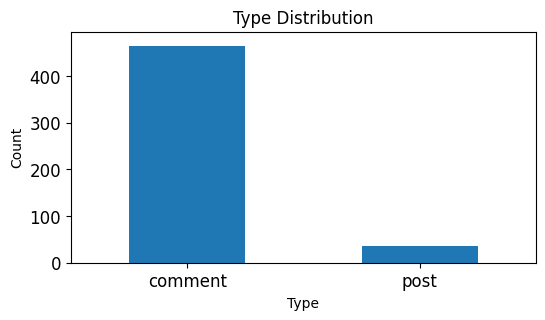

In [31]:
import matplotlib.pyplot as plt

X_sample['type'].value_counts().plot(
    kind='bar',
    title='Type Distribution',
    ylim=[0, X_sample['type'].value_counts().max() + 30],
    rot=0,
    fontsize=12,
    figsize=(6, 3)
)
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

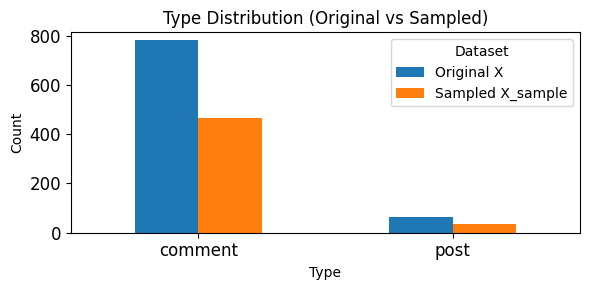

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

X_counts = X['type'].value_counts()
X_sample_counts = X_sample['type'].value_counts()

compare_df = pd.DataFrame({
    'Original X': X_counts,
    'Sampled X_sample': X_sample_counts
}).fillna(0)

compare_df.plot(
    kind='bar',
    title='Type Distribution (Original vs Sampled)',
    ylim=[0, X['type'].value_counts().max() + 30],
    rot=0,
    figsize=(6, 3),
    fontsize=12
)

plt.xlabel('Type')
plt.ylabel('Count')
plt.legend(title='Dataset')
plt.tight_layout()
plt.show()

In [42]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['calls', 'on', 'retards']

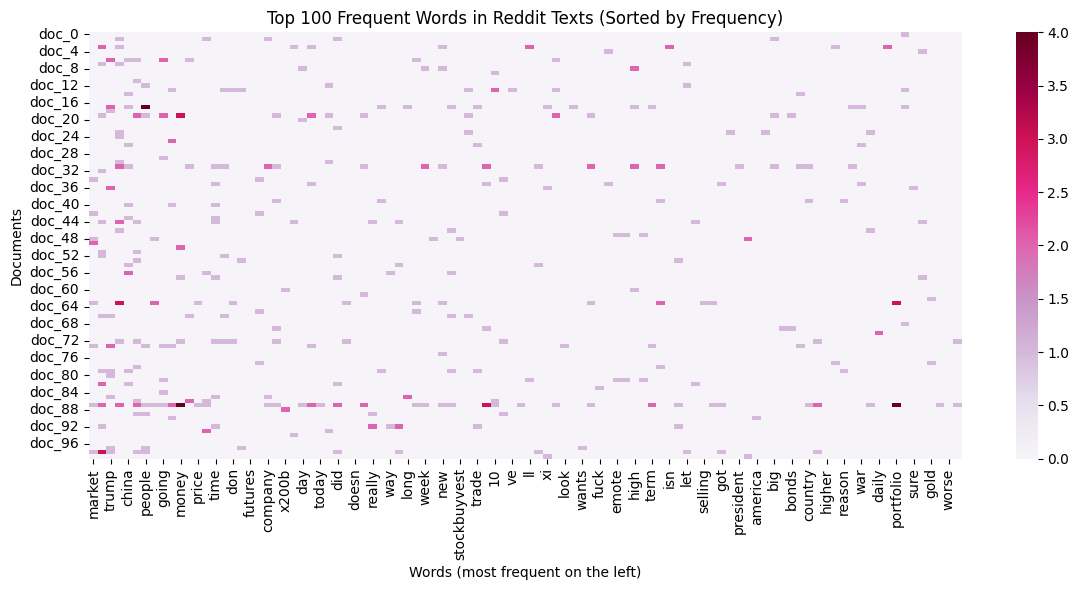

     word  freq
0  market   111
1    just    95
2   trump    92
3    like    83
4   china    72
5   think    52
6  people    51
7   stock    51
8   going    50
9    good    46


In [46]:
import numpy as np
import seaborn as sns

count_vect = CountVectorizer(stop_words='english')
texts = X['text'].dropna()
X_counts = count_vect.fit_transform(texts)
vocab = count_vect.get_feature_names_out()
term_freq = np.array(X_counts.sum(axis=0)).flatten()
top_indices = term_freq.argsort()[-100:][::-1]
top_terms = [vocab[i] for i in top_indices]
top_freqs = term_freq[top_indices]
n_docs = min(100, X_counts.shape[0])
X_top = X_counts[:n_docs, top_indices].toarray()

df_todraw = pd.DataFrame(
    X_top,
    columns=top_terms,
    index=[f"doc_{i}" for i in range(n_docs)]
)
df_todraw = df_todraw[top_terms]

plt.figure(figsize=(12, 6))
sns.heatmap(df_todraw,
            cmap="PuRd",
            annot=False,
            cbar=True,
            linewidths=0)

plt.title("Top 100 Frequent Words in Reddit Texts (Sorted by Frequency)")
plt.xlabel("Words (most frequent on the left)")
plt.ylabel("Documents")
plt.tight_layout()
plt.show()

print(pd.DataFrame({'word': top_terms[:10], 'freq': top_freqs[:10]}))

In [49]:
import plotly.express as px

count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(X['text'].dropna())
vocab = count_vect.get_feature_names_out()
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()

df_plotly = pd.DataFrame({
    'term': vocab[:300],
    'frequency': term_frequencies[:300]
})

fig = px.bar(df_plotly,
             x='term',
             y='frequency',
             title='Top 300 Terms (Original Order)',
             height=600)

fig.update_layout(
    xaxis_tickangle=-90,
    margin=dict(l=20, r=20, t=50, b=150)
)
fig.show()

In [48]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(X['text'].dropna())
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()
vocab = count_vect.get_feature_names_out()
top_indices = term_frequencies.argsort()[-50:][::-1]
top_terms = [vocab[i] for i in top_indices]
top_freqs = term_frequencies[top_indices]

df_plotly = pd.DataFrame({
    'term': top_terms,
    'frequency': top_freqs
})

fig = px.bar(df_plotly,
             x='term',
             y='frequency',
             title='Top 50 Term Frequencies (Reddit Dataset)',
             height=600)

fig.update_layout(
    xaxis_tickangle=-90,
    margin=dict(l=20, r=20, t=50, b=150)
)
fig.show()

In [50]:
count_vect = CountVectorizer(stop_words='english')
X_counts = count_vect.fit_transform(X['text'].dropna())
term_frequencies = np.array(X_counts.sum(axis=0)).flatten()
term_frequencies_log = np.log1p(term_frequencies)
N = 50
top_idx = term_frequencies.argsort()[-N:][::-1]

df_top_log = pd.DataFrame({
    "term": count_vect.get_feature_names_out()[top_idx],
    "frequency_log": term_frequencies_log[top_idx]
})

fig = px.bar(df_top_log,
             x="term",
             y="frequency_log",
             title=f"Top {N} Term Frequencies (Log Scale, Reddit Dataset)",
             height=500)
fig.update_layout(xaxis_tickangle=-90,
                  margin=dict(l=0, r=0, t=60, b=120))
fig.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22996\2807788579.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




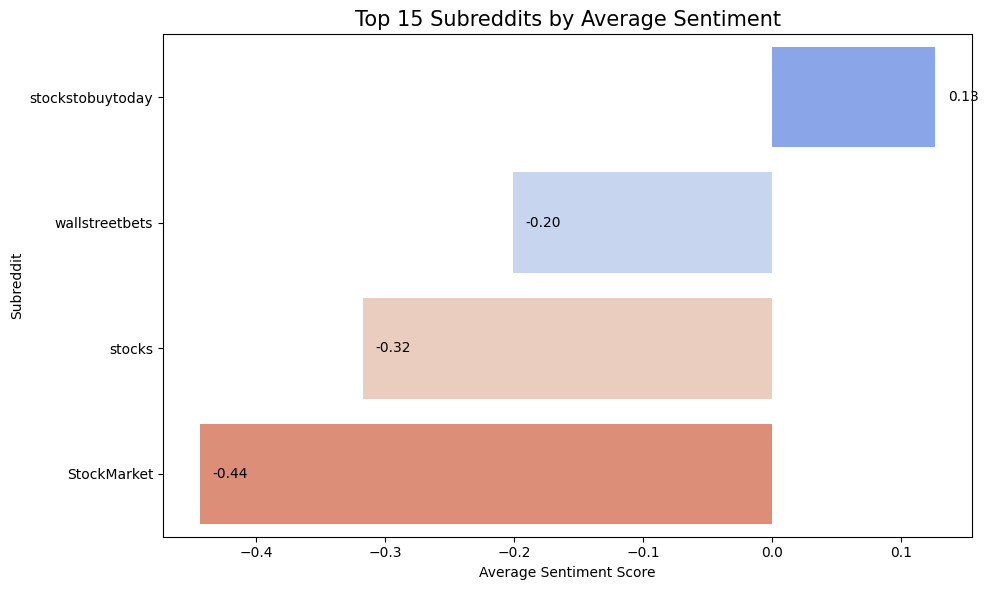

In [64]:
avg_sentiment = (
    X.groupby('subreddit')['label']
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

df_avg = avg_sentiment.reset_index()
df_avg.columns = ['subreddit', 'avg_sentiment']

plt.figure(figsize=(10,6))
sns.barplot(
    data=df_avg,
    y='subreddit',
    x='avg_sentiment',
    palette='coolwarm',
)
plt.title("Top 15 Subreddits by Average Sentiment", fontsize=15)
plt.xlabel("Average Sentiment Score")
plt.ylabel("Subreddit")

for index, value in enumerate(df_avg['avg_sentiment']):
    plt.text(value + 0.01, index, f"{value:.2f}", va='center')

plt.tight_layout()
plt.show()
#Extracts the top 15 subreddits with the highest average label values.
#draw a horizontal bar chart, making subreddit names easier to read.
#Adds numerical labels to the right side of each bar to show the exact average sentiment

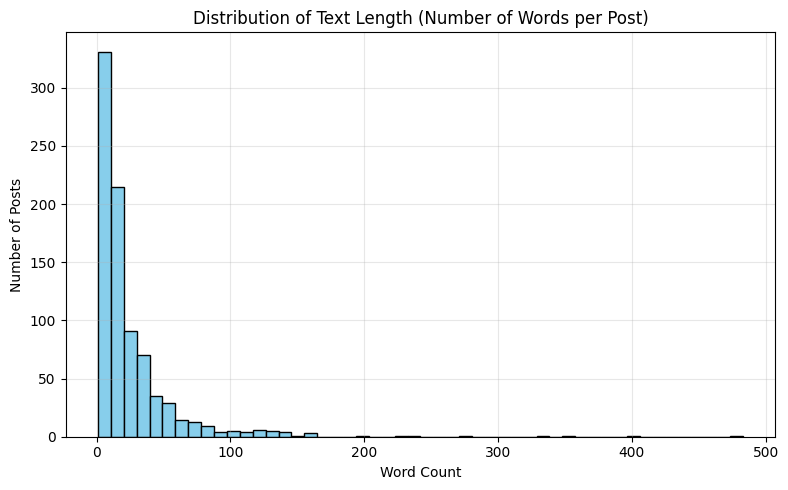

In [67]:
X['text'] = X['text'].astype(str)
X['text_length'] = X['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(8,5))
X['text_length'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Text Length (Number of Words per Post)')
plt.xlabel('Word Count')
plt.ylabel('Number of Posts')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()
#use chart to show how long Reddit posts typically are

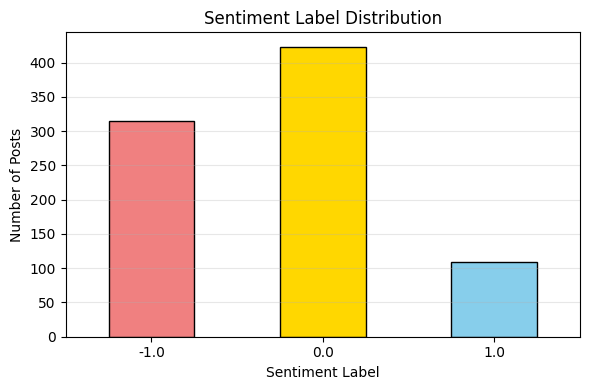

In [69]:
plt.figure(figsize=(6,4))
X['label'].value_counts().sort_index().plot(
    kind='bar',
    color=['lightcoral', 'gold', 'skyblue'],  # optional: color by sentiment
    edgecolor='black'
)

plt.title('Sentiment Label Distribution')
plt.xlabel('Sentiment Label')
plt.ylabel('Number of Posts')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
#counts how many posts fall into each sentiment label and draw a chart to show it

# Phase 2

In [ ]:
### Begin Assignment Here